Customer Segmentation Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [5]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data Visualization

Univariate Analysis


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


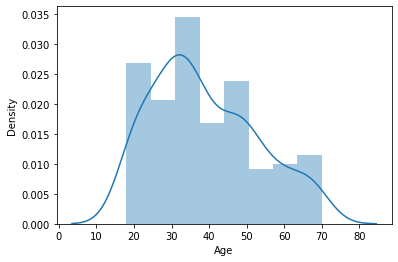

In [8]:
sns.distplot(df["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


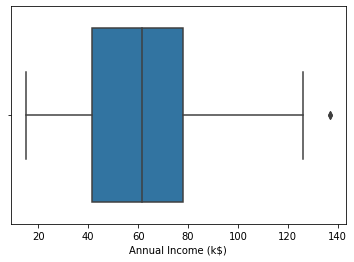

In [9]:
sns.boxplot(df["Annual Income (k$)"])

Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


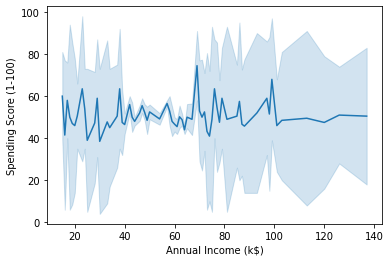

In [10]:
sns.lineplot(df["Annual Income (k$)"],df["Spending Score (1-100)"])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


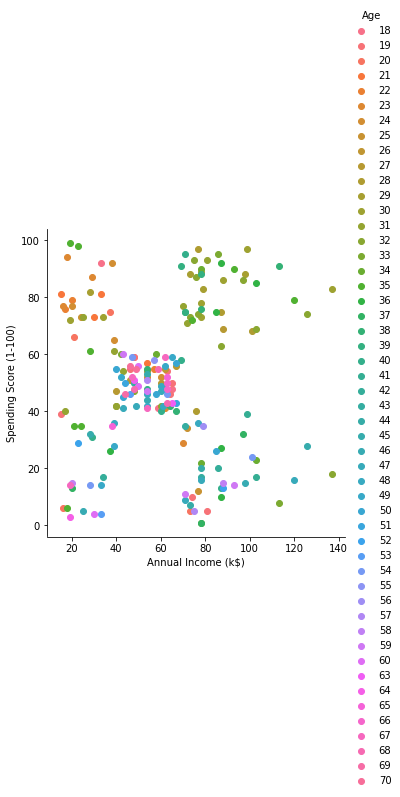

In [11]:
sns.FacetGrid(df,hue="Age",size=5).map(plt.scatter,"Annual Income (k$)","Spending Score (1-100)").add_legend()
plt.show()

Multivariate Analysis

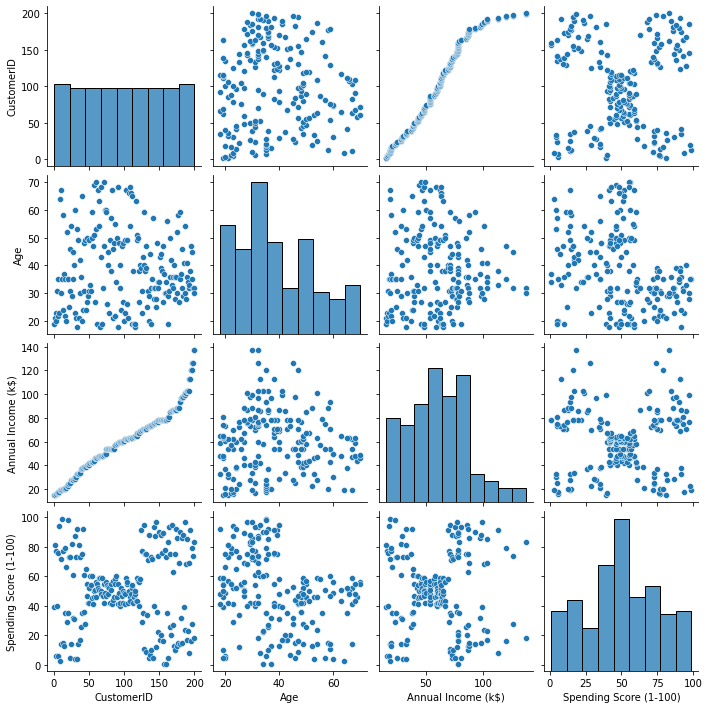

In [12]:
sns.pairplot(df)

Descriptive Statistics

In [13]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [14]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [15]:
df["Age"].mode()

0    32
dtype: int64

In [16]:
df["Spending Score (1-100)"].mode()

0    42
dtype: int64

Handling the Missing Values


In [18]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In the above dataset there are no missing values.If the missing values are present we can replace it using mean, median or mode of that feature.

Finding and replacing the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


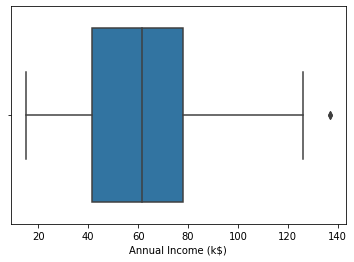

In [19]:
sns.boxplot(df["Annual Income (k$)"])

Removing the outliers using IQR Technique

In [20]:
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_whisker,upper_whisker,np.where(df['Annual Income (k$)']<lower_whisker,lower_whisker,df['Annual Income (k$)']))
df.shape

(200, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


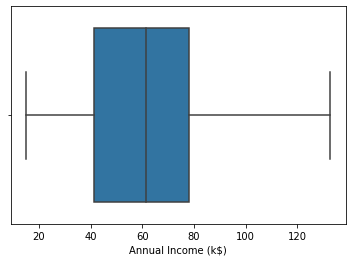

In [21]:
sns.boxplot(df['Annual Income (k$)'])

Performing Encoding inorder to convert Categorical values into the numerical values

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Performing Label Encoding

In [24]:
df["Gender"]=le.fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


In [25]:
df=df.drop("CustomerID",axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


Splitting the Data into independent and dependent features

In [26]:
x= df.iloc[:, [1, 2]].values
x.shape

(200, 2)

In [27]:
x

array([[ 19.  ,  15.  ],
       [ 21.  ,  15.  ],
       [ 20.  ,  16.  ],
       [ 23.  ,  16.  ],
       [ 31.  ,  17.  ],
       [ 22.  ,  17.  ],
       [ 35.  ,  18.  ],
       [ 23.  ,  18.  ],
       [ 64.  ,  19.  ],
       [ 30.  ,  19.  ],
       [ 67.  ,  19.  ],
       [ 35.  ,  19.  ],
       [ 58.  ,  20.  ],
       [ 24.  ,  20.  ],
       [ 37.  ,  20.  ],
       [ 22.  ,  20.  ],
       [ 35.  ,  21.  ],
       [ 20.  ,  21.  ],
       [ 52.  ,  23.  ],
       [ 35.  ,  23.  ],
       [ 35.  ,  24.  ],
       [ 25.  ,  24.  ],
       [ 46.  ,  25.  ],
       [ 31.  ,  25.  ],
       [ 54.  ,  28.  ],
       [ 29.  ,  28.  ],
       [ 45.  ,  28.  ],
       [ 35.  ,  28.  ],
       [ 40.  ,  29.  ],
       [ 23.  ,  29.  ],
       [ 60.  ,  30.  ],
       [ 21.  ,  30.  ],
       [ 53.  ,  33.  ],
       [ 18.  ,  33.  ],
       [ 49.  ,  33.  ],
       [ 21.  ,  33.  ],
       [ 42.  ,  34.  ],
       [ 30.  ,  34.  ],
       [ 36.  ,  37.  ],
       [ 20.  ,  37.  ],


In [28]:
y=df.iloc[:,-1].values
print(y)

[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47 55 42
 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40 42 52
 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59 43 57
 56 40 58 91 29 77 35 95 11 75  9 75 34 71  5 88  7 73 10 72  5 93 40 87
 12 97 36 74 22 90 17 88 20 76 16 89  1 78  1 73 35 83  5 93 26 75 20 95
 27 63 13 75 10 92 13 86 15 69 14 90 32 86 15 88 39 97 24 68 17 85 23 69
  8 91 16 79 28 74 18 83]


Scaling the independent variables

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

Using Standard Scaler

In [30]:
x_scaled

array([[-1.42456879, -1.74542941],
       [-1.28103541, -1.74542941],
       [-1.3528021 , -1.70708307],
       [-1.13750203, -1.70708307],
       [-0.56336851, -1.66873673],
       [-1.20926872, -1.66873673],
       [-0.27630176, -1.6303904 ],
       [-1.13750203, -1.6303904 ],
       [ 1.80493225, -1.59204406],
       [-0.6351352 , -1.59204406],
       [ 2.02023231, -1.59204406],
       [-0.27630176, -1.59204406],
       [ 1.37433211, -1.55369772],
       [-1.06573534, -1.55369772],
       [-0.13276838, -1.55369772],
       [-1.20926872, -1.55369772],
       [-0.27630176, -1.51535138],
       [-1.3528021 , -1.51535138],
       [ 0.94373197, -1.43865871],
       [-0.27630176, -1.43865871],
       [-0.27630176, -1.40031237],
       [-0.99396865, -1.40031237],
       [ 0.51313183, -1.36196603],
       [-0.56336851, -1.36196603],
       [ 1.08726535, -1.24692702],
       [-0.70690189, -1.24692702],
       [ 0.44136514, -1.24692702],
       [-0.27630176, -1.24692702],
       [ 0.08253169,

In [31]:
x_scaled  = pd.DataFrame(x_scaled, columns = df.columns[2:4])
x_scaled

,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.745429
1,-1.281035,-1.745429
2,-1.352802,-1.707083
3,-1.137502,-1.707083
4,-0.563369,-1.668737
...,...,...
195,-0.276302,2.280936
196,0.441365,2.511014
197,-0.491602,2.511014
198,-0.491602,2.769852


Perform any of the clustering algorithms and add the cluster data with the primary dataset
K-means clustering based on annual income

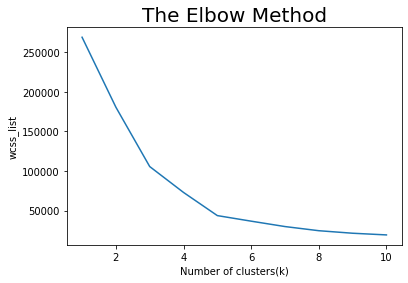

In [32]:
X = df.iloc[:, [2, 3]].values
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method', fontsize = 20)  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

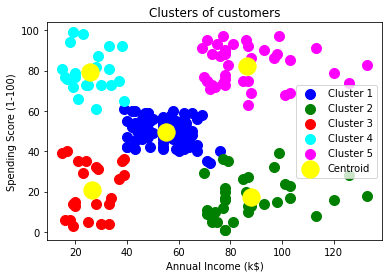

In [33]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X[y_predict== 2, 0], X[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

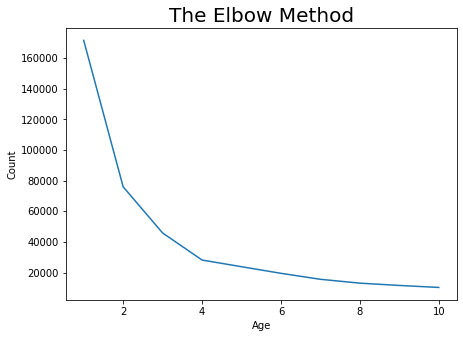

In [34]:
X = df.iloc[:, [1, 3]].values
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (7, 5)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

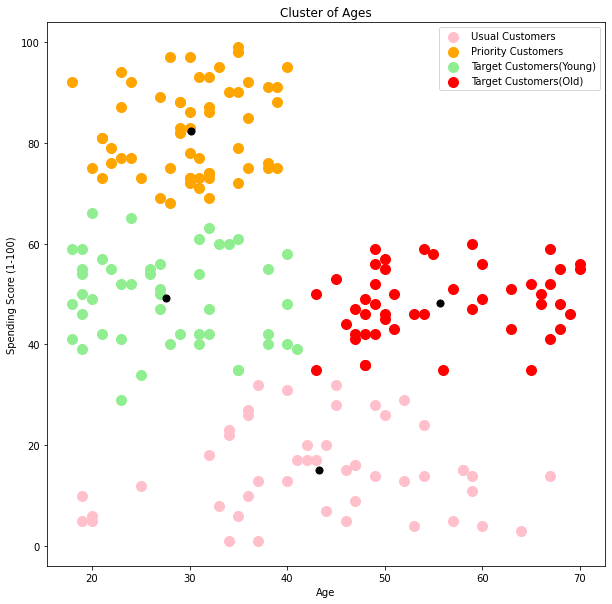

In [35]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(X)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages')

plt.scatter(X[ymeans == 0, 0], X[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(X[ymeans == 1, 0], X[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(X[ymeans == 2, 0], X[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(X[ymeans == 3, 0], X[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

K-means clustering based on Gender

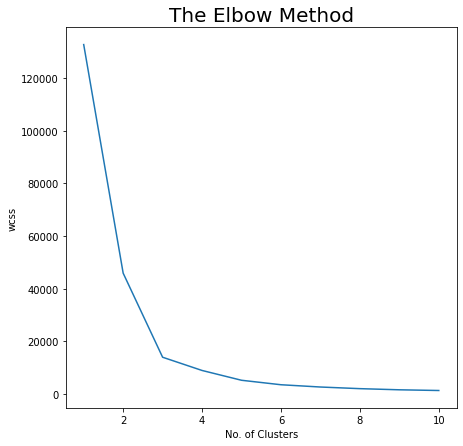

In [36]:
X = df.iloc[:, [0, 3]].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  
plt.rcParams['figure.figsize'] = (7, 7)
plt.title('The Elbow Method', fontsize = 20)
plt.plot(range(1, 11), wcss)
plt.xlabel('No. of Clusters', fontsize = 10)
plt.ylabel('wcss')
plt.show()

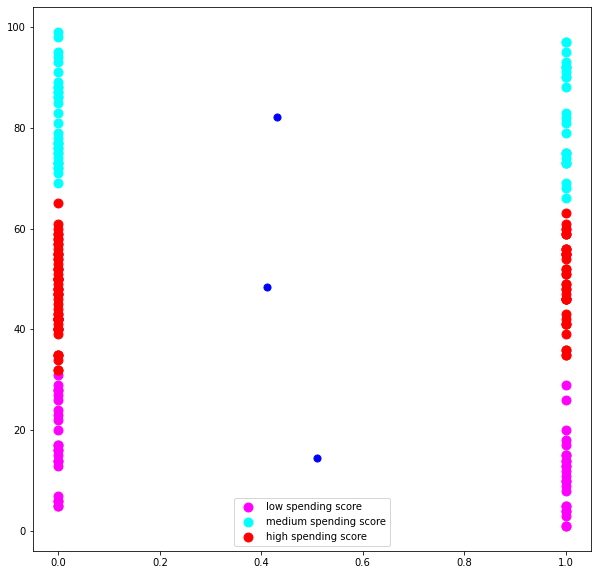

In [37]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(X)

plt.rcParams['figure.figsize'] = (10, 10)
plt.scatter(X[ymeans == 0, 0], X[ymeans == 0, 1], s = 80, c = 'magenta', label = 'low spending score')
plt.scatter(X[ymeans == 1, 0], X[ymeans == 1, 1], s = 80, c = 'cyan', label = 'medium spending score')
plt.scatter(X[ymeans == 2, 0], X[ymeans == 2, 1], s = 80, c = 'red', label = 'high spending score')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, color = 'blue')
plt.legend()
plt.show()

Split the data into training and testing

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train

array([[ 39.  ,  71.  ],
       [ 47.  ,  60.  ],
       [ 32.  ,  97.  ],
       [ 35.  ,  23.  ],
       [ 38.  ,  78.  ],
       [ 48.  ,  60.  ],
       [ 50.  ,  43.  ],
       [ 31.  ,  81.  ],
       [ 33.  ,  42.  ],
       [ 55.  ,  57.  ],
       [ 35.  ,  74.  ],
       [ 68.  ,  59.  ],
       [ 32.  ,  73.  ],
       [ 49.  ,  62.  ],
       [ 25.  ,  77.  ],
       [ 50.  ,  58.  ],
       [ 66.  ,  63.  ],
       [ 37.  ,  20.  ],
       [ 35.  ,  28.  ],
       [ 32.  ,  75.  ],
       [ 28.  , 101.  ],
       [ 50.  ,  40.  ],
       [ 19.  ,  74.  ],
       [ 35.  , 120.  ],
       [ 68.  ,  63.  ],
       [ 67.  ,  47.  ],
       [ 20.  ,  16.  ],
       [ 53.  ,  46.  ],
       [ 44.  ,  73.  ],
       [ 32.  , 126.  ],
       [ 31.  ,  39.  ],
       [ 67.  ,  19.  ],
       [ 47.  , 120.  ],
       [ 60.  ,  50.  ],
       [ 45.  , 126.  ],
       [ 59.  ,  93.  ],
       [ 30.  ,  88.  ],
       [ 43.  ,  71.  ],
       [ 40.  ,  60.  ],
       [ 38.  ,  64.  ],


In [39]:
x_train.shape

(140, 2)

In [40]:
x_test


array([[ 52.,  23.],
       [ 40.,  87.],
       [ 54.,  63.],
       [ 48.,  61.],
       [ 27.,  88.],
       [ 46.,  98.],
       [ 22.,  17.],
       [ 48.,  77.],
       [ 58.,  20.],
       [ 44.,  78.],
       [ 19.,  46.],
       [ 31.,  70.],
       [ 37.,  97.],
       [ 47.,  78.],
       [ 57.,  54.],
       [ 23.,  18.],
       [ 18.,  33.],
       [ 47.,  71.],
       [ 30.,  34.],
       [ 59.,  54.],
       [ 29.,  98.],
       [ 28.,  77.],
       [ 24.,  39.],
       [ 30.,  78.],
       [ 70.,  46.],
       [ 39.,  69.],
       [ 35.,  93.],
       [ 30.,  99.],
       [ 40.,  69.],
       [ 49.,  39.],
       [ 35.,  21.],
       [ 47.,  43.],
       [ 43.,  78.],
       [ 19.,  63.],
       [ 46.,  25.],
       [ 36., 103.],
       [ 38.,  71.],
       [ 31.,  17.],
       [ 46.,  54.],
       [ 66.,  63.],
       [ 20.,  73.],
       [ 43.,  48.],
       [ 45.,  28.],
       [ 19.,  64.],
       [ 36.,  87.],
       [ 54.,  47.],
       [ 64.,  19.],
       [ 26.,

In [41]:
x_test.shape

(60, 2)

In [42]:
y_train

array([75, 47, 86, 98, 76, 49, 45, 93, 60, 58, 72, 55, 73, 48, 12, 46, 48,
       13, 61, 93, 68, 55, 10, 79, 43, 52,  6, 46,  7, 74, 61, 14, 16, 56,
       28, 14, 86, 35, 40, 42,  1, 69, 52, 39, 42, 52, 52, 51, 95, 92, 47,
       42, 42, 46, 77, 83, 73, 24, 88, 35, 79, 52, 56, 54, 41, 53, 77, 43,
       26, 18,  6, 59, 57, 40, 89, 75,  1, 41, 83, 99, 57, 59, 81, 46, 59,
       81, 56,  5, 36, 42, 34, 92, 66, 26, 71, 60, 78, 11, 14, 31, 48, 88,
       73, 20, 95, 15,  4, 40, 63, 74, 87, 49, 41, 42, 50, 22, 91, 49, 48,
       82, 75, 55, 17, 13, 23, 75, 51,  5, 60, 55, 55, 17, 73, 72, 55, 48,
        8, 59, 47, 10])

In [43]:
y_test

array([29, 13, 46, 42, 69, 15, 76, 36, 15, 20, 55, 77, 32, 16, 51, 94, 92,
        9, 73, 47, 88, 97, 65, 73, 56, 91, 90, 97, 58, 28, 35, 41, 17, 54,
        5, 85, 75, 40, 44, 50,  5, 50, 32, 46, 27, 59,  3, 54, 43, 87, 42,
       29, 39, 50, 90, 14,  4, 35, 35, 50])

Training the model

In [44]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x, y)

RandomForestRegressor()

Testing the model

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=regressor.predict(x_test)
yu=regressor.predict([[ 19.  ,  15.  ]])
yu

array([42.5])

Measuring The Performance Using Metrics

In [46]:
print("MAE:",mean_absolute_error(y_test,y_pred))

MAE: 5.717562103174603


In [47]:
print("MSE:",mean_squared_error(y_test,y_pred))

MSE: 89.0335908389763


In [48]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 9.435761275009892


In [49]:
print("R2-Score:",r2_score(y_test,y_pred))

R2-Score: 0.8758661971370477
